In [1]:
!pip install wordcloud

In [2]:
!pip install scikit-learn

In [3]:
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
def select_columns(df):
    selected_columns = ['nama', 'harga', 'etalase', 'deskripsi']
    missing_columns = [col for col in selected_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Kolom berikut tidak ditemukan di DataFrame: {missing_columns}")
    return df[selected_columns]

In [4]:
df_elektronik = pd.read_excel('tokopedia_elektronik.xlsx')
df_pakaian = pd.read_excel('tokopedia_pakaian.xlsx')
df_kecantikan = pd.read_excel('tokopedia_kecantikan.xlsx')
df_elektronik.info()
df_pakaian.info()
df_kecantikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      10879 non-null  object
 1   web-scraper-start-url  10879 non-null  object
 2   produk                 10879 non-null  object
 3   produk-href            10879 non-null  object
 4   nama                   10836 non-null  object
 5   harga                  10836 non-null  object
 6   etalase                10833 non-null  object
 7   deskripsi              10372 non-null  object
dtypes: object(8)
memory usage: 680.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17987 entries, 0 to 17986
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      17987 non-null  object
 1   web-scraper-start-url  17987 non-null  object
 2   produk                 

In [5]:
# Import library yang diperlukan
import pandas as pd

# Membaca data dari file Excel (lokal)
df_elektronik = pd.read_excel('tokopedia_elektronik.xlsx')
df_pakaian = pd.read_excel('tokopedia_pakaian.xlsx')
df_kecantikan = pd.read_excel('tokopedia_kecantikan.xlsx')

# Tampilkan informasi kolom untuk pengecekan manual
print("Kolom df_elektronik:", df_elektronik.columns.tolist())
print("Kolom df_pakaian:", df_pakaian.columns.tolist())
print("Kolom df_kecantikan:", df_kecantikan.columns.tolist())

# Kolom yang digunakan untuk mendeteksi duplikat dan data kosong
# Gantilah kolom_kunci ini sesuai dengan kolom asli dari file jika berbeda
kolom_kunci = ['nama', 'harga', 'etalase', 'deskripsi']

# Fungsi pembersih dengan validasi kolom
def bersihkan_data(df, kolom_kunci, nama_df):
    # Cek kolom yang valid
    kolom_valid = [kol for kol in kolom_kunci if kol in df.columns]
    
    if not kolom_valid:
        print(f"[{nama_df}] Tidak ada kolom kunci yang cocok.")
        return df
    
    print(f"\n[{nama_df}] Sebelum pembersihan: {len(df)} baris")
    df_clean = df.dropna(subset=kolom_valid).drop_duplicates(subset=kolom_valid)
    print(f"[{nama_df}] Setelah pembersihan: {len(df_clean)} baris")
    return df_clean

# Pembersihan data
df_elektronik_clean = bersihkan_data(df_elektronik, kolom_kunci, "Elektronik")
df_pakaian_clean = bersihkan_data(df_pakaian, kolom_kunci, "Pakaian")
df_kecantikan_clean = bersihkan_data(df_kecantikan, kolom_kunci, "Kecantikan")

# Simpan hasil ke file baru
df_elektronik_clean.to_excel('tokopedia_elektronik_clean.xlsx', index=False)
df_pakaian_clean.to_excel('tokopedia_pakaian_clean.xlsx', index=False)
df_kecantikan_clean.to_excel('tokopedia_kecantikan_clean.xlsx', index=False)

print("\n✅ Semua file berhasil dibersihkan dan disimpan.")


Kolom df_elektronik: ['web-scraper-order', 'web-scraper-start-url', 'produk', 'produk-href', 'nama', 'harga', 'etalase', 'deskripsi']
Kolom df_pakaian: ['web-scraper-order', 'web-scraper-start-url', 'produk', 'produk-href', 'nama', 'harga', 'etalase', 'deskripsi']
Kolom df_kecantikan: ['web-scraper-order', 'web-scraper-start-url', 'produk', 'produk-href', 'nama', 'harga', 'etalase', 'deskripsi']

[Elektronik] Sebelum pembersihan: 10879 baris
[Elektronik] Setelah pembersihan: 3445 baris

[Pakaian] Sebelum pembersihan: 17987 baris
[Pakaian] Setelah pembersihan: 4261 baris

[Kecantikan] Sebelum pembersihan: 7176 baris
[Kecantikan] Setelah pembersihan: 6281 baris

✅ Semua file berhasil dibersihkan dan disimpan.


In [6]:
# Label Kategori
df_elektronik_clean['kategori'] = 'Elektronik'
df_pakaian_clean['kategori'] = 'Pakaian'
df_kecantikan_clean['kategori'] = 'Kecantikan'

In [7]:
# Satukan Data
selected_cols = ['nama', 'deskripsi', 'kategori']

df_elektronik_clean = df_elektronik_clean[selected_cols]
df_pakaian_clean = df_pakaian_clean[selected_cols]
df_kecantikan_clean = df_kecantikan_clean[selected_cols]

df_all = pd.concat([df_elektronik_clean, df_pakaian_clean, df_kecantikan_clean], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13987 entries, 0 to 13986
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nama       13987 non-null  object
 1   deskripsi  13987 non-null  object
 2   kategori   13987 non-null  object
dtypes: object(3)
memory usage: 327.9+ KB


In [8]:
# Tampilkan info data keseluruhan
print("=== Info Data Keseluruhan (sample 30 baris) ===")
print(df_all.sample(30))
print("Jumlah data keseluruhan:", len(df_all))

=== Info Data Keseluruhan (sample 30 baris) ===
                                                    nama  \
775                Samsung Galaxy S25 Ultra 12/256 Black   
7636   Jiso Rok Jeans Wanita Highwaist A-Linen Korean...   
1351   AOC G24G4 24INCH FHD 16:9 FLAT IPS 126% SRGB 1...   
1708   MSI KATANA 15 HX RTX5070 I7 14650HX 16GB 512GB...   
2746   Usb Hub Ps4 Pro Playstation 4 Usb Hardisk ekst...   
8539   LOREAL PARIS INFAILLIBLE 3 SECOND SETTING MIST...   
9122   Gogotales All in One Blush Eyeshadow Sweethear...   
1572   Lenovo IdeaCentre AIO 3 22IAP7 i5-12450H 8GB 5...   
12673  VIVA Milk Cleanser (Susu Pembersih) 100ml / 20...   
5081   Breeze Relaxed Long Pants Broken White [ Celan...   
12687        COSRX LOWPH GOOD MORNING GEL CLEANSER 150ML   
12975                  Ustraa Face Wash Oily Skin (200g)   
7594   Highwaist Cutbray Jeans Wanita - Celana Panjan...   
1298   LENOVO PC DESKTOP IdeaCentre IC 3 07IAB7 i3-12...   
535           Tecno Camon 20 Pro 8/256GB - Predawn B

In [9]:
import re
import string
# Untuk membersihkan teks deskripsi dan nama
def filtering_text(text):
    if isinstance(text, str):
        text = text.lower()  # ke huruf kecil
        text = re.sub(r'https?:\/\/\S+', '', text)  # hapus URL
        text = re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text)  # hapus mention/link/hashtag
        text = re.sub(r"(b'{1,2})", "", text)  # hapus karakter byte
        text = re.sub(r'[^a-zA-Z]', ' ', text)  # hanya huruf
        text = re.sub(r'\d+', '', text)  # hapus angka
        text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
        text = re.sub(r'(.)\1{2,}', r'\1', text)  # hapus huruf berulang
        text = re.sub(r'\s+', ' ', text).strip()  # hilangkan whitespace berlebih
        return text
    else:
        return ""

# Fungsi menghapus stopword custom
custom_stopwords = [
    "saya", "kamu", "dia", "kami", "mereka", "anda", "kalian", "kita", "ini", "itu", "sana", "sini", "siapa", "apa", "mana", "kapan", "bagaimana",
    "kalian", "kita", "semua", "orang", "anak", "teman", "dan", "banyak", "yang","na", "menjaga", "membuat",
    "dengan", "untuk", "di", "to", "and", "tidak", "dari", "warna", "the", "dapat", "lebih", "x", "tidak", "hari","digunakan", "up", "hari", "semua", "sesuai",
    "siapa", "apa", "mana", "kapan", "bagaimana", "ini", "itu", "sini", "sana", "situ", "tersebut", "begini", "begitu",
    "dan", "atau", "serta", "tetapi", "karena", "sehingga", "jika", "agar", "oleh", "a", "b", "c", "d", "e", "f", "g","h", "i", "j", "k", "l",
    "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "menggunakan", "membantu", "memberikan",
    "dari", "ke", "di", "pada", "dengan", "untuk", "tanpa", "dalam", "hingga", "selama","secara","cara", "size", "halus",
    "adalah", "ialah", "merupakan", "bisa", "dapat", "akan", "telah", "sudah", "belum", "jam", "air","toko",
    "jadi", "buat", "pakai", "gunakan", "ada", "terbuat", "menjadi", "gunakan", "pakai", "saat",
    "bagus", "baik", "baru", "lama", "murah", "mahal", "banyak", "sedikit", "cepat", "lambat",
    "mudah", "sulit", "lebih", "kurang", "tahan", "nyaman", "ringan", "kuat", "enak", "cantik",
    "produk", "barang", "hal", "waktu", "tempat", "harga", "warna", "jenis", "model", "ukuran", "selamat", "datang",
    "panjang", "lebar", "tinggi", "besar", "kecil", "jumlah", "pcs", "gram", "ml", "cm", "meter", "kemasan", "desain",
    "fitur", "sistem", "fungsi", "layar", "tombol", "bagian", "bahan", "tampilan", "manual",
    "resmi", "original", "baru", "bekas", "reseller", "stok", "ready", "kualitas", "versi",
    "unit", "item", "seri", "kode", "opsi", "kemudahan", "favorit", "tersedia", "cocok", "no", "sebelum", "jam"
    "detail", "gaya", "mode", "bentuk", "pengguna", "milik", "brand", "merk",
    "the", "to", "and", "of", "in", "is", "on", "at", "by", "with", "for", "a", "an",
    "be", "are", "was", "were", "from", "as", "that", "this", "it",
    "ya", "nya", "lho", "kok", "deh", "dong", "nih", "sih"
]
stopword_set = set(custom_stopwords)

def remove_stopwords(text):
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word not in stopword_set]
        return ' '.join(filtered_tokens)
    return ""

In [10]:
# Pembersihan teks dan hapus stopwords pada df_all
df_all['nama_bersih'] = df_all['nama'].apply(filtering_text).apply(remove_stopwords)
df_all['deskripsi_bersih'] = df_all['deskripsi'].apply(filtering_text).apply(remove_stopwords)

# Lihat hasil akhir
df_all[['nama', 'nama_bersih', 'deskripsi', 'deskripsi_bersih']].head()

,nama,nama_bersih,deskripsi,deskripsi_bersih
0,HP Pavilion x360 14 Core 7-150U 16GB 512GB SSD...,hp pavilion core gb gb ssd fhd ips touch ek tu...,HP Envy x360 14 inch 2-in-1\n\nHP Pavilion X36...,hp envy inch hp pavilion ek tu natural silver ...
1,Lenovo V14 Ryzen 3 7320U 256GB SSD 8GB Win11+O...,lenovo ryzen gb ssd gb win ohs antigores,Lenovo V14 Ryzen 3 7320U 256GB SSD 8GB Win11+O...,lenovo ryzen gb ssd gb win ohs lenovo sku yt i...
2,HP 14s-dq5155TU i7-1255U 512GB SSD 8GB IPS Win...,hp dq tu gb ssd gb ips win ohs antigores,HP 14s-dq5155TU i7-1255U 512GB SSD 8GB IPS Win...,hp dq tu gb ssd gb ips win ohs hp dq tu sku pa...
3,Laptop Lenovo V14 i3-1215U 256GB SSD 8GB Win11...,laptop lenovo gb ssd gb win ohs gb standar ant...,Laptop Lenovo V14 i3-1215U 256GB SSD 8GB Win11...,laptop lenovo gb ssd gb win ohs garansi lenovo...
4,ASUS Vivobook Go 14 E410KA N4500 8GB 256GB INT...,asus vivobook go ka gb gb intel uhd fhd ohs ra...,ASUS Vivobook Go 14 E410KA-FHD426 - BLACK - RA...,asus vivobook go ka fhd black ram gb asus vivo...


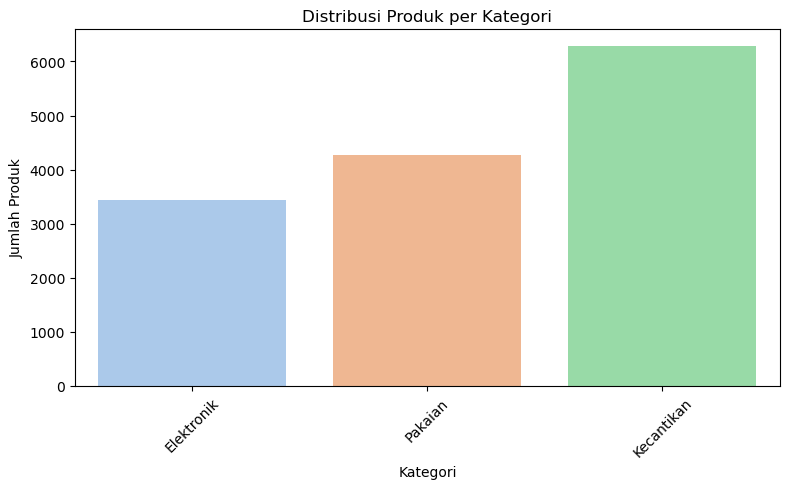

In [11]:
# Visualisasi distribusi kategori
plt.figure(figsize=(8, 5))
sns.countplot(data=df_all, x='kategori', palette='pastel', hue='kategori', legend=False)
plt.title("Distribusi Produk per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

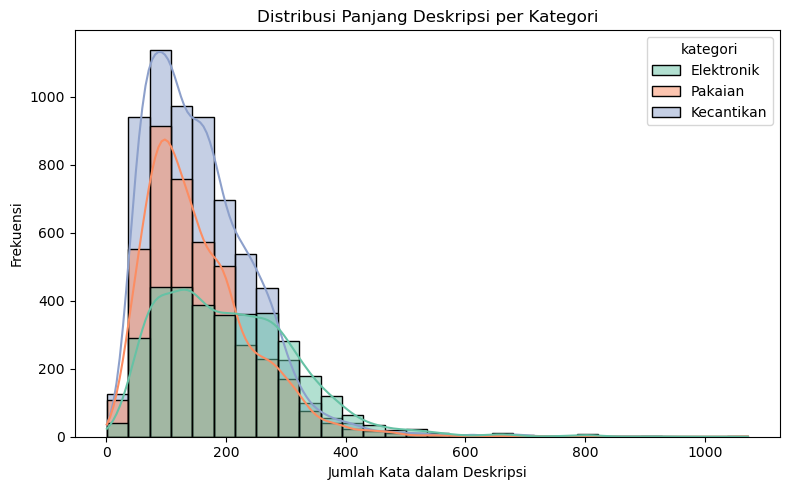

In [12]:
# Tambahkan kolom panjang deskripsi
df_all['panjang_deskripsi'] = df_all['deskripsi'].astype(str).apply(lambda x: len(x.split()))

# Visualisasi panjang deskripsi
plt.figure(figsize=(8, 5))
sns.histplot(data=df_all, x='panjang_deskripsi', hue='kategori', bins=30, kde=True, palette='Set2')
plt.title("Distribusi Panjang Deskripsi per Kategori")
plt.xlabel("Jumlah Kata dalam Deskripsi")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

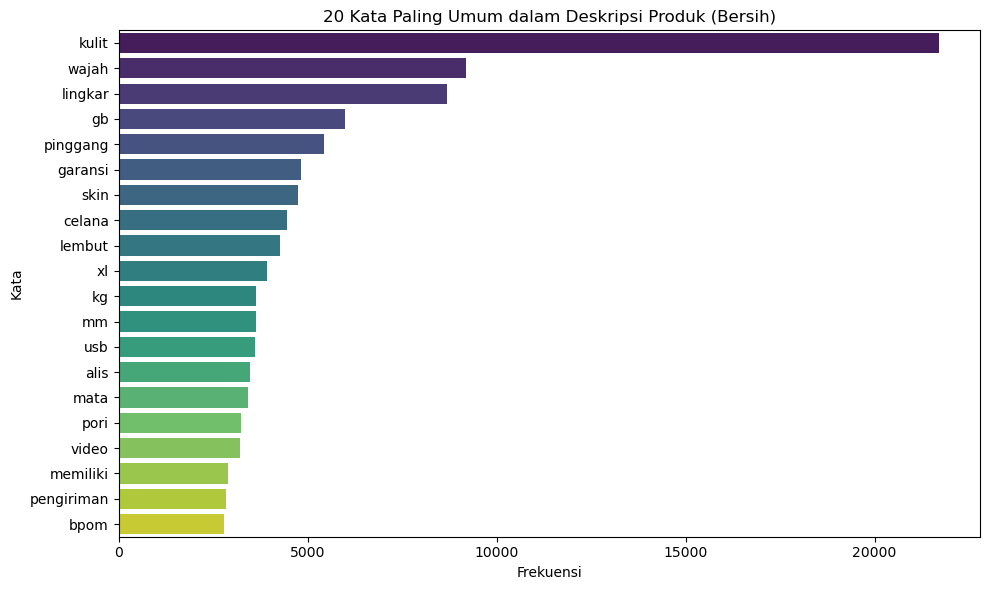

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenisasi dan penghitungan frekuensi kata seluruh data deskripsi bersih
all_tokens = []

for text in df_all['deskripsi_bersih']:
    tokens = word_tokenize(str(text).lower())
    filtered = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
    all_tokens.extend(filtered)

# Ambil 20 kata paling umum
common_words = Counter(all_tokens).most_common(20)
words, freqs = zip(*common_words)

# Visualisasi 20 kata paling umum
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(words), hue=words, palette='viridis', legend=False)
plt.title("20 Kata Paling Umum dalam Deskripsi Produk (Bersih)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.tight_layout()
plt.show()


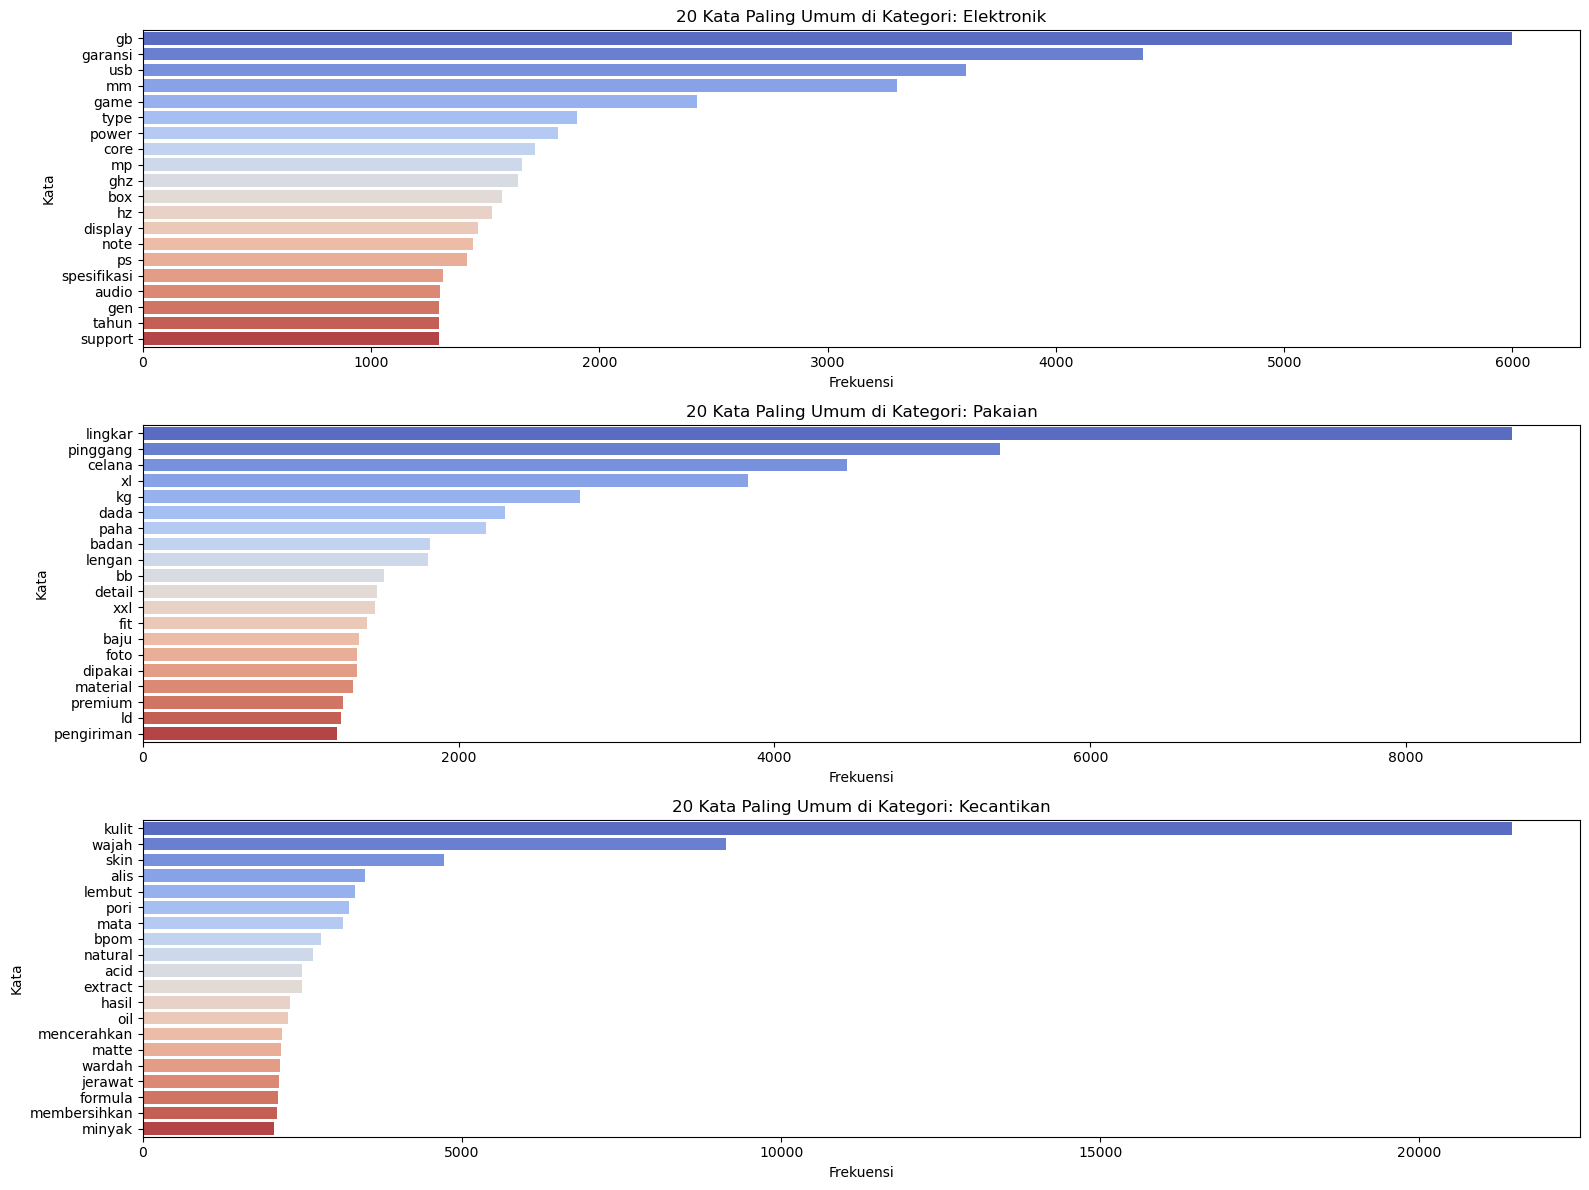

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenisasi dan penghitungan frekuensi kata seluruh data deskripsi bersih
def plot_common_words_per_category(df, text_col, category_col, stopwords, top_n=20):
    kategori_list = df[category_col].unique()
    
    plt.figure(figsize=(16, 4 * len(kategori_list)))
    for i, kategori in enumerate(kategori_list, 1):
        df_kat = df[df[category_col] == kategori]

        tokens = []
        for text in df_kat[text_col]:
            words = word_tokenize(str(text).lower())
            filtered = [w for w in words if w.isalpha() and w not in stopwords]
            tokens.extend(filtered)

        common_words = Counter(tokens).most_common(top_n)
        if len(common_words) == 0:
            print(f"Tidak ada kata valid di kategori {kategori}")
            continue

        words, freqs = zip(*common_words)

        plt.subplot(len(kategori_list), 1, i)
        sns.barplot(x=list(freqs), y=list(words), palette='coolwarm', hue=words, legend=False)
        plt.title(f"20 Kata Paling Umum di Kategori: {kategori}")
        plt.xlabel("Frekuensi")
        plt.ylabel("Kata")

    plt.tight_layout()
    plt.show()

# Jalankan fungsi untuk langsung menampilkan hasil
plot_common_words_per_category(df_all, 'deskripsi_bersih', 'kategori', custom_stopwords)


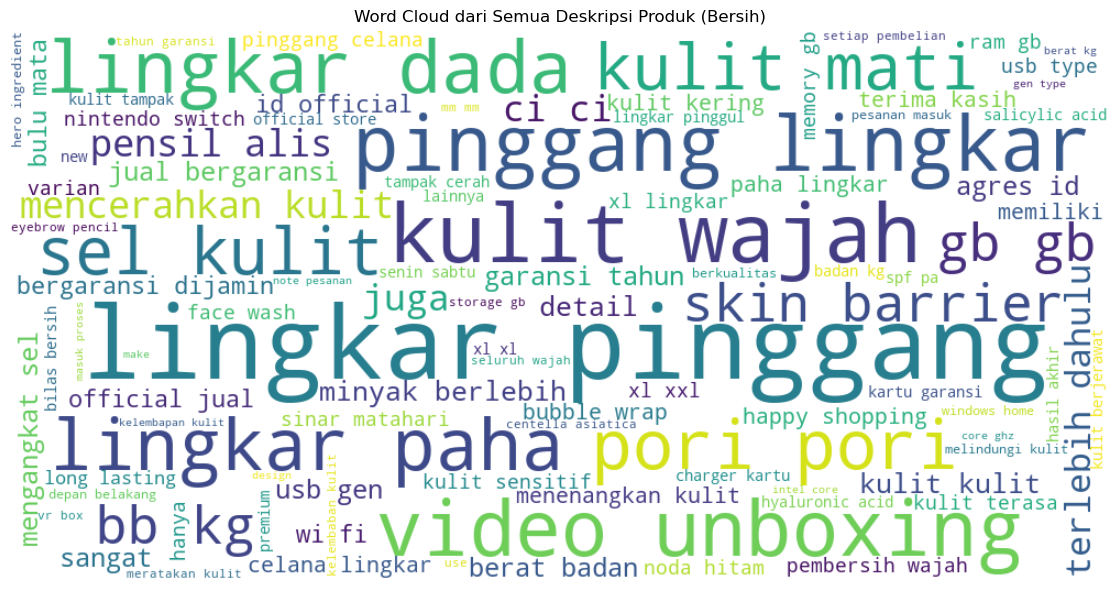

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat Word Cloud dari seluruh deskripsi
def plot_word_cloud(df, text_col):
    all_text = " ".join(df[text_col].dropna().astype(str))

    wordcloud_all = WordCloud(width=1000, height=500, background_color='white',
                              colormap='viridis', max_words=100).generate(all_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_all, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud dari Semua Deskripsi Produk (Bersih)")
    plt.tight_layout()
    plt.show()

plot_word_cloud(df_all, 'deskripsi_bersih')


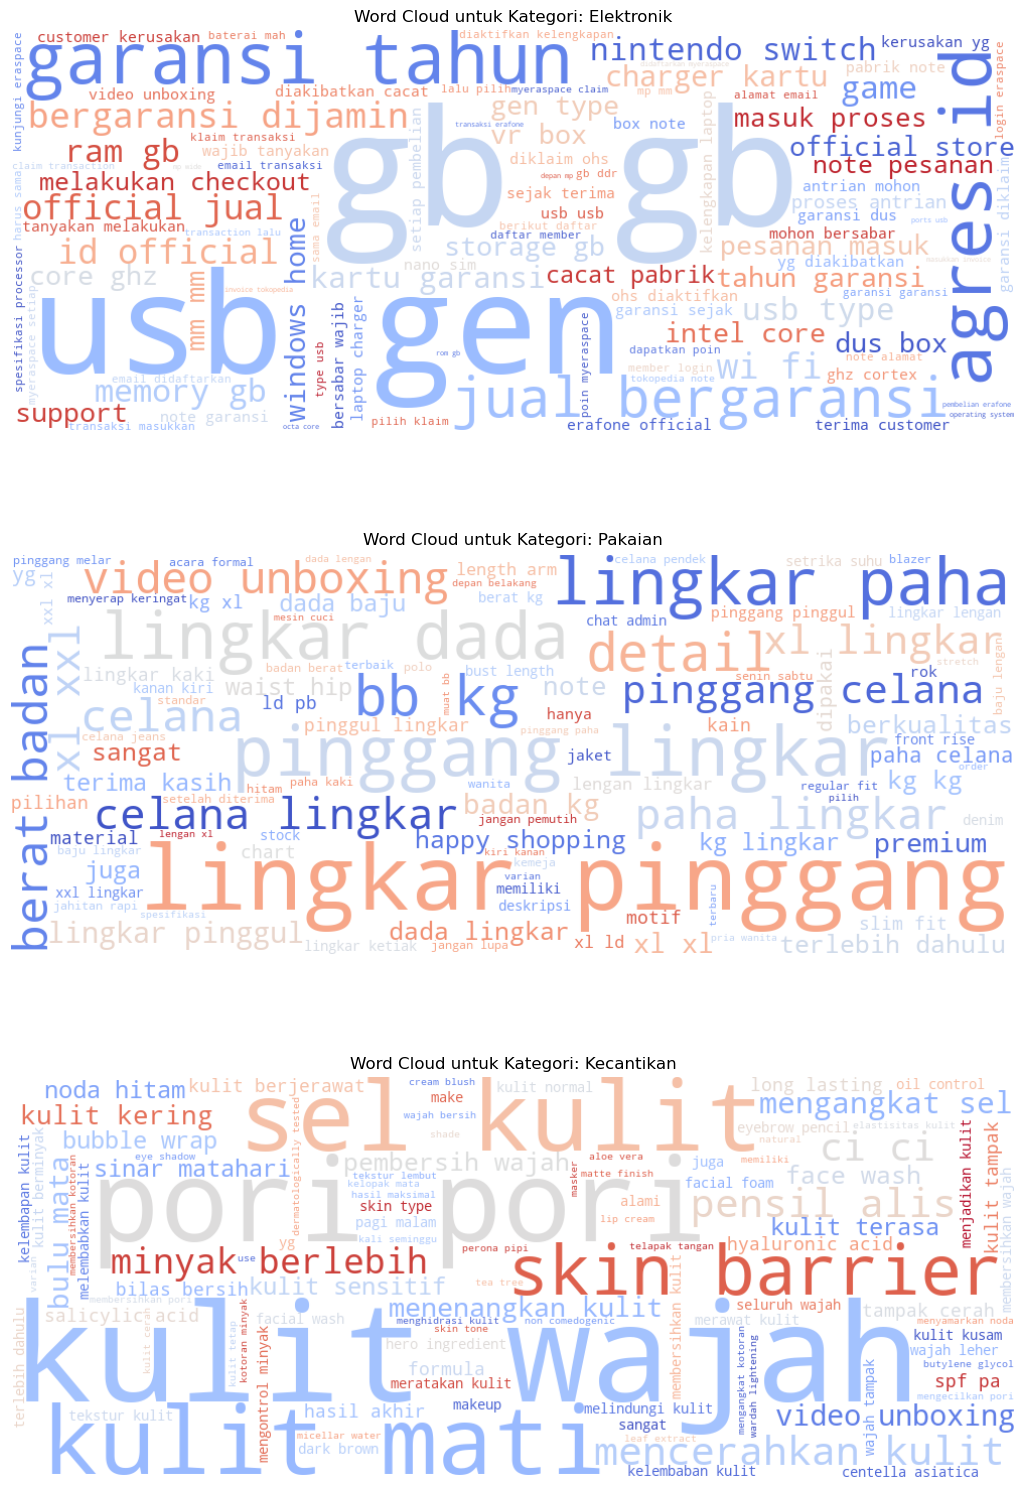

In [16]:
# Fungsi untuk membuat Word Cloud per kategori
def plot_word_cloud_per_category(df, text_col, category_col):
    kategori_list = df[category_col].unique()
    
    plt.figure(figsize=(16, 5 * len(kategori_list)))
    for i, kategori in enumerate(kategori_list, 1):
        df_kat = df[df[category_col] == kategori]
        text_kat = " ".join(df_kat[text_col].dropna().astype(str))

        if len(text_kat.strip()) == 0:
            print(f"Tidak ada teks bersih untuk kategori: {kategori}")
            continue

        wordcloud_kat = WordCloud(width=1000, height=400, background_color='white',
                                  colormap='coolwarm', max_words=100).generate(text_kat)

        plt.subplot(len(kategori_list), 1, i)
        plt.imshow(wordcloud_kat, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud untuk Kategori: {kategori}")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)  
    plt.show()
    plt.show()

plot_word_cloud_per_category(df_all, 'deskripsi_bersih', 'kategori')

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Vektorisasi kolom deskripsi_bersih jadi fitur numerik
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_all['deskripsi_bersih'])

# 2. Target label dari kategori
y = df_all['kategori']

# 3. Split data train-test dengan stratify supaya proporsi kategori seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. SMOTE butuh input dense array, ubah sparse matrix ke dense
X_train_dense = X_train.toarray()

# 5. Terapkan SMOTE agar kelas minoritas diseimbangkan
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_dense, y_train)

# 6. Ubah X_test juga ke dense jika model membutuhkannya
X_test_dense = X_test.toarray()

# 7. Print distribusi kelas untuk cek balancing
print("Distribusi label sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi label setelah SMOTE:\n", pd.Series(y_train_balanced).value_counts())


Distribusi label sebelum SMOTE:
 kategori
Kecantikan    5024
Pakaian       3409
Elektronik    2756
Name: count, dtype: int64
Distribusi label setelah SMOTE:
 kategori
Kecantikan    5024
Elektronik    5024
Pakaian       5024
Name: count, dtype: int64


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [20, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=1)
rf_grid.fit(X_train_balanced, y_train_balanced)
best_rf = rf_grid.best_estimator_

y_pred_rf_train = best_rf.predict(X_train_balanced)
y_pred_rf_test = best_rf.predict(X_test_dense)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Naive Bayes hyperparameter tuning
nb_param_grid = {'alpha': [0.1, 0.5]}

nb_clf = MultinomialNB()
nb_grid = GridSearchCV(nb_clf, nb_param_grid, cv=5, scoring='accuracy', n_jobs=1)
nb_grid.fit(X_train_balanced, y_train_balanced)
best_nb = nb_grid.best_estimator_

y_pred_nb_train = best_nb.predict(X_train_balanced)
y_pred_nb_test = best_nb.predict(X_test_dense)


In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Buat salinan dari kolom yang diperlukan agar tidak menimbulkan SettingWithCopyWarning
X = df_all[['nama_bersih', 'deskripsi_bersih']].copy()
y = df_all['kategori']

# Gabungkan teks dari kolom 'nama_bersih' dan 'deskripsi_bersih'
X['combined_text'] = X['nama_bersih'] + ' ' + X['deskripsi_bersih']

# Split dataset ke dalam training dan testing
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X['combined_text'], y, test_size=0.2, stratify=y, random_state=42
)

# Tokenisasi teks
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Definisikan LabelEncoder untuk mengonversi label kategori ke angka
le_kategori = LabelEncoder()
le_kategori.fit(y)  
y_train_encoded = le_kategori.transform(y_train)
y_test_encoded = le_kategori.transform(y_test)

# Oversampling untuk menyeimbangkan dataset pada training set
ros = RandomOverSampler(random_state=42)
X_train_pad_ros, y_train_ros = ros.fit_resample(X_train_pad, y_train_encoded)


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalMaxPooling1D, Dense

input_text = Input(shape=(max_len,), name='input_text')
embedding = Embedding(max_words, 64, input_length=max_len)(input_text)
pooling = GlobalMaxPooling1D()(embedding)

dense1 = Dense(64, activation='relu')(pooling)
output = Dense(len(np.unique(y_train)), activation='softmax')(dense1)

ann_model = Model(inputs=input_text, outputs=output)
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ann_model.fit(
    X_train_pad_ros, y_train_ros,
    epochs=10, batch_size=32, validation_split=0.1, verbose=2
)

y_pred_ann_prob_train = ann_model.predict(X_train_pad_ros)
y_pred_ann_train = y_pred_ann_prob_train.argmax(axis=1)

y_pred_ann_prob_test = ann_model.predict(X_test_pad)
y_pred_ann_test = y_pred_ann_prob_test.argmax(axis=1)

Epoch 1/10


C:\Users\MyBook Hype AMD\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


424/424 - 3s - 7ms/step - accuracy: 0.9115 - loss: 0.2615 - val_accuracy: 0.9934 - val_loss: 0.0322
Epoch 2/10
424/424 - 1s - 3ms/step - accuracy: 0.9964 - loss: 0.0171 - val_accuracy: 0.9993 - val_loss: 0.0069
Epoch 3/10
424/424 - 1s - 3ms/step - accuracy: 0.9990 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 4/10
424/424 - 1s - 3ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
424/424 - 1s - 3ms/step - accuracy: 1.0000 - loss: 7.2139e-04 - val_accuracy: 1.0000 - val_loss: 6.9292e-04
Epoch 6/10
424/424 - 1s - 3ms/step - accuracy: 1.0000 - loss: 3.4595e-04 - val_accuracy: 1.0000 - val_loss: 2.8874e-04
Epoch 7/10
424/424 - 1s - 3ms/step - accuracy: 1.0000 - loss: 2.0326e-04 - val_accuracy: 1.0000 - val_loss: 2.0639e-04
Epoch 8/10
424/424 - 1s - 3ms/step - accuracy: 1.0000 - loss: 1.2565e-04 - val_accuracy: 1.0000 - val_loss: 1.3992e-04
Epoch 9/10
424/424 - 1s - 3ms/step - accuracy: 1.0000 - loss: 8.4271e-05 - val_accuracy: 1.

In [22]:
from tensorflow.keras.layers import LSTM

input_text_lstm = Input(shape=(max_len,), name='input_text_lstm')
embedding_lstm = Embedding(max_words, 64, input_length=max_len)(input_text_lstm)
lstm_layer = LSTM(64)(embedding_lstm)

dense_lstm = Dense(64, activation='relu')(lstm_layer)
output_lstm = Dense(len(np.unique(y_train)), activation='softmax')(dense_lstm)

lstm_model = Model(inputs=input_text_lstm, outputs=output_lstm)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(
    X_train_pad_ros, y_train_ros,
    epochs=10, batch_size=32, validation_split=0.1, verbose=2
)

y_pred_lstm_prob_train = lstm_model.predict(X_train_pad_ros)
y_pred_lstm_train = y_pred_lstm_prob_train.argmax(axis=1)

y_pred_lstm_prob_test = lstm_model.predict(X_test_pad)
y_pred_lstm_test = y_pred_lstm_prob_test.argmax(axis=1)


Epoch 1/10
424/424 - 16s - 38ms/step - accuracy: 0.8631 - loss: 0.3706 - val_accuracy: 0.9005 - val_loss: 0.3104
Epoch 2/10
424/424 - 13s - 32ms/step - accuracy: 0.8994 - loss: 0.2852 - val_accuracy: 0.8999 - val_loss: 0.2362
Epoch 3/10
424/424 - 14s - 32ms/step - accuracy: 0.9620 - loss: 0.1440 - val_accuracy: 0.9755 - val_loss: 0.0895
Epoch 4/10
424/424 - 14s - 32ms/step - accuracy: 0.9740 - loss: 0.1070 - val_accuracy: 0.9410 - val_loss: 0.2411
Epoch 5/10
424/424 - 14s - 34ms/step - accuracy: 0.9797 - loss: 0.0873 - val_accuracy: 0.9894 - val_loss: 0.0458
Epoch 6/10
424/424 - 15s - 34ms/step - accuracy: 0.9866 - loss: 0.0595 - val_accuracy: 0.8999 - val_loss: 0.2492
Epoch 7/10
424/424 - 13s - 32ms/step - accuracy: 0.9881 - loss: 0.0399 - val_accuracy: 0.9973 - val_loss: 0.0156
Epoch 8/10
424/424 - 13s - 32ms/step - accuracy: 0.9934 - loss: 0.0287 - val_accuracy: 0.9993 - val_loss: 0.0168
Epoch 9/10
424/424 - 14s - 32ms/step - accuracy: 0.9976 - loss: 0.0116 - val_accuracy: 0.9993 - 

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import numpy as np

def ensure_encoded(y, label_encoder):
    """
    Jika elemen pertama merupakan string, asumsikan seluruh array
    masih berupa string dan lakukan transformasi dengan label_encoder.
    """
    y = np.array(y)  # Pastikan y berupa array agar bisa diindeks dengan y[0]
    if isinstance(y[0], str):
        return label_encoder.transform(y)
    return y

def print_evaluation_train_test(y_true_train, y_pred_train, y_true_test, y_pred_test,
                                model_name, best_params=None, target_names=None,
                                label_encoder=None):
    """
    Mencetak metrik evaluasi untuk training dan testing set.
    
    Parameter:
      - y_true_train, y_pred_train : true label dan prediksi pada training (harus konsisten)
      - y_true_test, y_pred_test   : true label dan prediksi pada testing (harus konsisten)
      - model_name                 : nama model sebagai string
      - best_params                : (opsional) parameter terbaik hasil grid search
      - target_names               : daftar nama kelas untuk classification_report
      - label_encoder              : instance LabelEncoder untuk mengonversi label jika diperlukan
    """
    # Ubah label jika label_encoder disediakan
    if label_encoder is not None:
        y_true_train = ensure_encoded(y_true_train, label_encoder)
        y_pred_train = ensure_encoded(y_pred_train, label_encoder)
        y_true_test  = ensure_encoded(y_true_test, label_encoder)
        y_pred_test  = ensure_encoded(y_pred_test, label_encoder)

    print(f"\n========== Evaluasi {model_name} ==========")
    if best_params is not None:
        print("Best Parameters:", best_params)
    
    print("\n--- Training Set Metrics ---")
    print("Accuracy :", accuracy_score(y_true_train, y_pred_train))
    print("Recall   :", recall_score(y_true_train, y_pred_train, average='macro'))
    print("Precision:", precision_score(y_true_train, y_pred_train, average='macro'))
    print("F1-Score :", f1_score(y_true_train, y_pred_train, average='macro'))
    
    print("\n--- Test Set Metrics ---")
    print("Accuracy :", accuracy_score(y_true_test, y_pred_test))
    print("Recall   :", recall_score(y_true_test, y_pred_test, average='macro'))
    print("Precision:", precision_score(y_true_test, y_pred_test, average='macro'))
    print("F1-Score :", f1_score(y_true_test, y_pred_test, average='macro'))
    
    print("\n--- Classification Report (Test) ---")
    print(classification_report(y_true_test, y_pred_test, target_names=target_names))
    print()
target_names = le_kategori.classes_


In [24]:
# Contoh pemanggilan untuk model Random Forest:
print_evaluation_train_test(
    y_true_train = y_train_balanced,        
    y_pred_train = y_pred_rf_train,
    y_true_test  = y_test_encoded,         
    y_pred_test  = y_pred_rf_test,          
    model_name   = "Random Forest",
    best_params  = rf_grid.best_params_,
    target_names = target_names,
    label_encoder = le_kategori
)


========== Evaluasi Random Forest ==========
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Training Set Metrics ---
Accuracy : 0.9999336518046709
Recall   : 0.999933651804671
Precision: 0.9999336650082918
F1-Score : 0.9999336518040138

--- Test Set Metrics ---
Accuracy : 0.9871336669049321
Recall   : 0.9860063013695258
Precision: 0.9866927467471633
F1-Score : 0.9863403908850411

--- Classification Report (Test) ---
              precision    recall  f1-score   support

  Elektronik       0.99      0.98      0.98       689
  Kecantikan       0.99      0.99      0.99      1257
     Pakaian       0.98      0.99      0.98       852

    accuracy                           0.99      2798
   macro avg       0.99      0.99      0.99      2798
weighted avg       0.99      0.99      0.99      2798




In [25]:
# Evaluasi model Naive Bayes:
print_evaluation_train_test(
    y_true_train = y_train_balanced,   
    y_pred_train = y_pred_nb_train,
    y_true_test  = y_test_encoded,
    y_pred_test  = y_pred_nb_test,
    model_name   = "Naive Bayes",
    best_params  = nb_grid.best_params_,
    target_names = target_names,
    label_encoder = le_kategori
)


========== Evaluasi Naive Bayes ==========
Best Parameters: {'alpha': 0.1}

--- Training Set Metrics ---
Accuracy : 0.9917728237791932
Recall   : 0.9917728237791933
Precision: 0.9919101381637377
F1-Score : 0.9917812495692936

--- Test Set Metrics ---
Accuracy : 0.9892780557541101
Recall   : 0.9905398320818342
Precision: 0.9878158704847961
F1-Score : 0.9891170029265391

--- Classification Report (Test) ---
              precision    recall  f1-score   support

  Elektronik       0.99      0.99      0.99       689
  Kecantikan       1.00      0.98      0.99      1257
     Pakaian       0.97      0.99      0.98       852

    accuracy                           0.99      2798
   macro avg       0.99      0.99      0.99      2798
weighted avg       0.99      0.99      0.99      2798




In [26]:
# Evaluasi model ANN:
print_evaluation_train_test(
    y_true_train = y_train_ros,        
    y_pred_train = y_pred_ann_train,
    y_true_test  = y_test_encoded,
    y_pred_test  = y_pred_ann_test,
    model_name   = "ANN",
    target_names = target_names,
    label_encoder = le_kategori
)


========== Evaluasi ANN ==========

--- Training Set Metrics ---
Accuracy : 1.0
Recall   : 1.0
Precision: 1.0
F1-Score : 1.0

--- Test Set Metrics ---
Accuracy : 0.996783416726233
Recall   : 0.9965458692942476
Precision: 0.9963635954423792
F1-Score : 0.9964535771633415

--- Classification Report (Test) ---
              precision    recall  f1-score   support

  Elektronik       0.99      1.00      1.00       689
  Kecantikan       1.00      1.00      1.00      1257
     Pakaian       1.00      0.99      1.00       852

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798




In [27]:
# Evaluasi model LSTM:
print_evaluation_train_test(
     y_true_train = y_train_ros, 
     y_pred_train = y_pred_lstm_train,
     y_true_test  = y_test_encoded,
     y_pred_test  = y_pred_lstm_test,
     model_name   = "LSTM",
     target_names = target_names,
     label_encoder = le_kategori
)


========== Evaluasi LSTM ==========

--- Training Set Metrics ---
Accuracy : 0.9989384288747346
Recall   : 0.9989384288747346
Precision: 0.9989385472760608
F1-Score : 0.998938362700185

--- Test Set Metrics ---
Accuracy : 0.9932094353109364
Recall   : 0.9929861096237705
Precision: 0.9919813464713475
F1-Score : 0.9924792488170456

--- Classification Report (Test) ---
              precision    recall  f1-score   support

  Elektronik       0.99      0.99      0.99       689
  Kecantikan       1.00      0.99      1.00      1257
     Pakaian       0.99      0.99      0.99       852

    accuracy                           0.99      2798
   macro avg       0.99      0.99      0.99      2798
weighted avg       0.99      0.99      0.99      2798




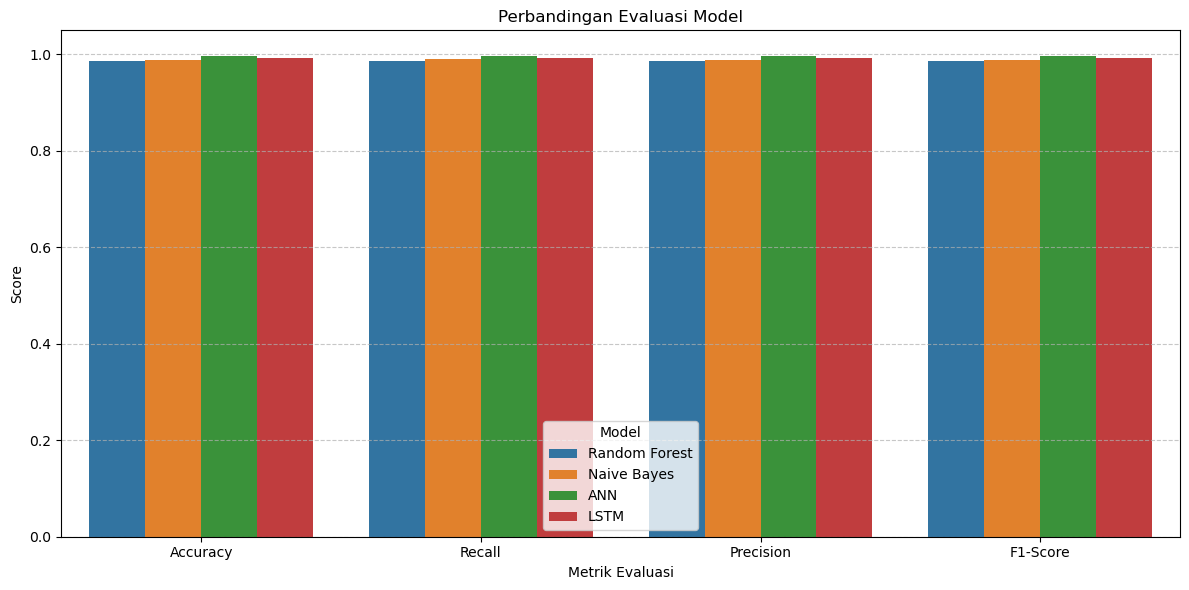

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Fungsi pembantu untuk memastikan array prediksi adalah numerik.
def ensure_numeric(pred, label_encoder):
    """
    Jika elemen pertama dari prediksi berupa string, maka anggap
    seluruh array masih berupa string dan lakukan transformasi.
    Jika sudah numerik, langsung kembalikan array tersebut.
    """
    # Cek apakah dtype merupakan object atau unicode
    if pred.dtype == np.object_ or pred.dtype.kind in 'OU':
        return label_encoder.transform(pred)
    return pred

# Pastikan semua prediksi dari masing-masing model berupa angka.
y_pred_rf_test   = ensure_numeric(y_pred_rf_test, le_kategori)
y_pred_nb_test   = ensure_numeric(y_pred_nb_test, le_kategori)
y_pred_ann_test  = ensure_numeric(y_pred_ann_test, le_kategori)
y_pred_lstm_test = ensure_numeric(y_pred_lstm_test, le_kategori)

# Buat dictionary yang berisi metrik evaluasi untuk masing-masing model
model_scores = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_rf_test),
        'Recall': recall_score(y_test_encoded, y_pred_rf_test, average='macro'),
        'Precision': precision_score(y_test_encoded, y_pred_rf_test, average='macro'),
        'F1-Score': f1_score(y_test_encoded, y_pred_rf_test, average='macro')
    },
    'Naive Bayes': {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_nb_test),
        'Recall': recall_score(y_test_encoded, y_pred_nb_test, average='macro'),
        'Precision': precision_score(y_test_encoded, y_pred_nb_test, average='macro'),
        'F1-Score': f1_score(y_test_encoded, y_pred_nb_test, average='macro')
    },
    'ANN': {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_ann_test),
        'Recall': recall_score(y_test_encoded, y_pred_ann_test, average='macro'),
        'Precision': precision_score(y_test_encoded, y_pred_ann_test, average='macro'),
        'F1-Score': f1_score(y_test_encoded, y_pred_ann_test, average='macro')
    },
    'LSTM': {
        'Accuracy': accuracy_score(y_test_encoded, y_pred_lstm_test),
        'Recall': recall_score(y_test_encoded, y_pred_lstm_test, average='macro'),
        'Precision': precision_score(y_test_encoded, y_pred_lstm_test, average='macro'),
        'F1-Score': f1_score(y_test_encoded, y_pred_lstm_test, average='macro')
    }
}

# Konversi dictionary ke DataFrame dan atur ulang indeks
score_df = pd.DataFrame(model_scores).T.reset_index().rename(columns={"index": "Model"})

# Lakukan melt data sehingga tiap bar dapat di-plot sebagai "Metric" dan "Score"
score_df_melted = score_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot evaluasi tiap model menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=score_df_melted, x='Metric', y='Score', hue='Model')
plt.ylim(0, 1.05)
plt.title('Perbandingan Evaluasi Model')
plt.xlabel('Metrik Evaluasi')
plt.ylabel('Score')
plt.legend(title='Model')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
import re
import joblib
import string
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Simpan Model dan Objek Preprocessing

# Simpan ANN model 
ann_model.save('ann_model.h5')
print("Saved ann_model.h5")

# Simpan Tokenizer yang digunakan untuk ANN 
joblib.dump(tokenizer, 'tokenizer.pkl')
print("Saved tokenizer.pkl")

# Simpan LabelEncoder untuk kategori
joblib.dump(le_kategori, 'label_encoder.pkl')
print("Saved label_encoder.pkl")


# Load Model dan Objek Preprocessing
try:
    ann_model = load_model('ann_model.h5')
    tokenizer = joblib.load('tokenizer.pkl')
    le_kategori = joblib.load('label_encoder.pkl')
    print("ANN model, Tokenizer, dan LabelEncoder berhasil dimuat.")
except Exception as e:
    print("Error loading model or preprocessing objects:", e)


# Fungsi Preprocessing
def filtering_text(text):
    """Bersihkan teks dari URL, angka, simbol, dan ubah ke lowercase."""
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text)
        text = re.sub(r"(b'{1,2})", "", text)
        # Hanya ambil karakter huruf, hapus simbol dan angka
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'(.)\1{2,}', r'\1', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Stopwords buatan sendiri 
custom_stopwords = [
    "saya", "kamu", "dia", "kami", "mereka", "anda", "kalian", "kita", "ini", "itu",
    "sana", "sini", "siapa", "apa", "mana", "kapan", "bagaimana", "dan", "banyak", 
    "yang", "na", "menjaga", "membuat", "dengan", "untuk", "di", "to", "and", "tidak",
    "dari", "warna", "the", "dapat", "lebih", "x", "hari", "digunakan", "up", "semua",
    "sesuai", "tersebut", "begini", "begitu", "atau", "serta", "tetapi", "karena", "sehingga",
    "jika", "agar", "oleh", "menggunakan", "membantu", "memberikan", "ke", "pada", "tanpa",
    "dalam", "hingga", "selama", "secara", "cara", "size", "halus", "adalah", "ialah",
    "merupakan", "bisa", "akan", "telah", "sudah", "belum", "jam", "air", "toko", "jadi",
    "buat", "pakai", "gunakan", "ada", "terbuat", "menjadi", "saat", "bagus", "baik",
    "baru", "lama", "murah", "mahal", "sedikit", "cepat", "lambat", "mudah", "sulit",
    "kurang", "tahan", "nyaman", "ringan", "kuat", "enak", "cantik", "produk", "barang",
    "hal", "waktu", "tempat", "harga", "jenis", "model", "ukuran", "selamat", "datang",
    "panjang", "lebar", "tinggi", "besar", "kecil", "jumlah", "pcs", "gram", "ml", "cm",
    "meter", "kemasan", "desain", "fitur", "sistem", "fungsi", "layar", "tombol",
    "bagian", "bahan", "tampilan", "manual", "resmi", "original", "bekas", "reseller",
    "stok", "ready", "kualitas", "versi", "unit", "item", "seri", "kode", "opsi",
    "kemudahan", "favorit", "tersedia", "cocok", "no", "sebelum", "detail", "gaya",
    "mode", "bentuk", "pengguna", "milik", "brand", "merk", "the", "to", "and", "of",
    "in", "is", "on", "at", "by", "with", "for", "a", "an", "be", "are", "was", "were",
    "from", "as", "that", "this", "it", "ya", "nya", "lho", "kok", "deh", "dong", "nih",
    "sih"
]
stopword_set = set(custom_stopwords)

def remove_stopwords(text):
    """Hilangkan stopwords dari teks."""
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word not in stopword_set]
        return ' '.join(filtered_tokens)
    return ""

# Fungsi Prediksi untuk ANN
def prediksi_kategori_ann(nama_produk, deskripsi_produk):
    """
    Prediksi kategori produk menggunakan model ANN.
    
    Proses:
      1. Preprocessing: filtering dan penghapusan stopwords.
      2. Tokenisasi dan padding menggunakan Tokenizer yang telah disimpan.
      3. Prediksi menggunakan ANN model.
      4. Decode hasil prediksi ke label kategori asli.
    
    Mengembalikan:
      - hasil_pred (str): Kategori produk yang diprediksi.
      - confidence (float): Nilai probabilitas tertinggi sebagai ukuran keyakinan.
    """
    # Preprocessing teks: filtering dan hapus stopwords
    nama_bersih = remove_stopwords(filtering_text(nama_produk))
    deskripsi_bersih = remove_stopwords(filtering_text(deskripsi_produk))
    combined_text = nama_bersih + " " + deskripsi_bersih

    # Tokenisasi dan padding menggunakan Tokenizer yang sudah disimpan
    max_len = 100  
    seq = tokenizer.texts_to_sequences([combined_text])
    padded_seq = pad_sequences(seq, maxlen=max_len, padding='post')

    # Prediksi menggunakan ANN
    pred_prob = ann_model.predict(padded_seq)
    confidence = float(pred_prob.max())  
    pred_class = np.argmax(pred_prob, axis=1)
    
    # Decode hasil prediksi ke label kategori asli menggunakan LabelEncoder
    hasil_pred = le_kategori.inverse_transform(pred_class)[0]
    return hasil_pred, confidence

# Contoh Pemanggilan Fungsi Prediksi untuk ANN
nama_produk = "Contoh Produk Elektronik"
deskripsi_produk = "Ini adalah produk elektronik dengan teknologi terbaru dan harga terjangkau."
kategori_predicted = prediksi_kategori_ann(nama_produk, deskripsi_produk)
print("Kategori Predicted:", kategori_predicted)


Saved ann_model.h5


Saved tokenizer.pkl
Saved label_encoder.pkl
ANN model, Tokenizer, dan LabelEncoder berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Kategori Predicted: ('Elektronik', 0.47129377722740173)


In [30]:
# Input dari Pengguna untuk Prediksi Kategori Produk dengan ANN

# Ambil input nama produk
nama_produk = input("Masukkan nama produk: ")

# Ambil input deskripsi produk multi-baris
print("\nMasukkan deskripsi produk (akhiri dengan baris kosong lalu tekan Enter):")
deskripsi_lines = []
while True:
    line = input()
    if line == "":
        break
    deskripsi_lines.append(line)
deskripsi_produk = "\n".join(deskripsi_lines)

# Prediksi kategori dan confidence menggunakan fungsi prediksi_kategori_ann
kategori_predicted, confidence = prediksi_kategori_ann(nama_produk, deskripsi_produk)
print("\nPrediksi Kategori:", kategori_predicted)
print("Confidence (akurasi run): {:.2f}%".format(confidence * 100))

# Daftar kategori utama yang diharapkan
allowed_categories = ["elektronik", "pakaian", "kecantikan"]

# Cek apakah kategori prediksi termasuk dalam daftar kategori utama
if kategori_predicted.lower() not in allowed_categories:
    print("Catatan: Data yang diinput tidak termasuk kategori utama (Elektronik, Pakaian, Kecantikan).")


Masukkan nama produk:  Samsung Galaxy A06 4/64GB - Light Green



Masukkan deskripsi produk (akhiri dengan baris kosong lalu tekan Enter):


 -Processor : Helio G85 -Size : 6.7" -Technology : 2GHz,1.8GHz -Resolution : HD+ -Rear Camera Resolution : 50MP + 2MPP -Main Camera Auto Focus : Yes -Rear Camera - OIS : No -Rear Camera - Zoom : Digital Zoom up to 10x -Front Camera Resolution :8MP -Front Camera Auto Focus : No -Video Resolution : FHD (1920 x 1080)@60fps -RAM : 4 GB -ROM : 64GB -SIM Tray : Dual-SIM -Network Type : 4G -USB Interface : USB Type-C -USB Version : USB 2.0 -Earjack : 3.5mm Stereo -Bluetooth Version : Bluetooth v5.3 -NFC : No -Battery Capacity : 5000MaH 25W Fast Charging Support" -Others : "Knox Vault EAL 5+ certified 2x OS update 4Years Sec. Update
 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Prediksi Kategori: Elektronik
Confidence (akurasi run): 100.00%
